/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[7.65428694e-01 1.44897959e-01 5.71428571e-02 3.33619360e-01
  3.99480519e-01 2.93135436e-01]
 [2.91597098e-01 2.91433544e-16 1.31838984e-16 2.58711748e-01
  3.57635292e-01 2.44123951e-01]]
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
1   Female  54.0             0              0         No Info  27.32   
2     Male  28.0             0              0           never  27.32   
3   Female  36.0             0              0         current  23.45   
4     Male  76.0             1              1         current  20.14   
5   Female  20.0             0              0           never  27.32   
6   Female  44.0             0              0           never  19.31   
7   Female  79.0             0              0         No Info  23.86   
8     Male  42.0             0              0           never  33.64   
9   Female  32.0             0              0           never  27.32   
10  Female  53.0 

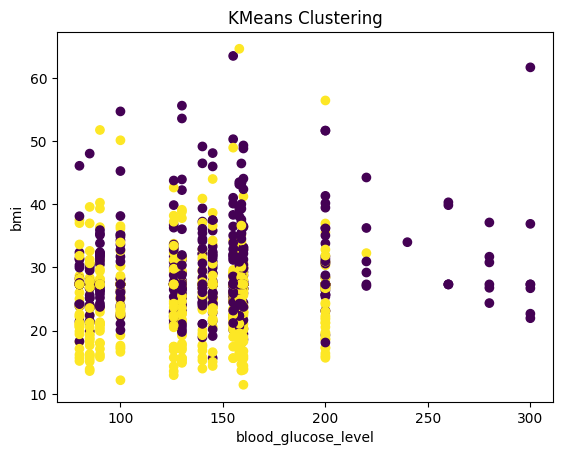

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes_prediction_dataset.csv')

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)

kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

print(kmeans.cluster_centers_)

print(data.head(50))

plt.scatter(data['blood_glucose_level'], data['bmi'], c=data['Cluster'], cmap='viridis')
plt.xlabel('blood_glucose_level')
plt.ylabel('bmi')
plt.title('KMeans Clustering')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def predict_cluster(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level):
    data = pd.read_csv('diabetes_prediction_dataset.csv')
    X = data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

    num_clusters = 2

    kmeans = KMeans(n_clusters=num_clusters)

    kmeans.fit(X)

    new_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    cluster = kmeans.predict(new_data)

    return cluster[0]

age = float(input("Masukkan usia: "))
hypertension = int(input("Apakah memiliki hipertensi? (1 untuk ya, 0 untuk tidak): "))
heart_disease = int(input("Apakah memiliki penyakit jantung? (1 untuk ya, 0 untuk tidak): "))
bmi = float(input("Masukkan BMI: "))
HbA1c_level = float(input("Masukkan level HbA1c: "))
blood_glucose_level = float(input("Masukkan level glukosa darah: "))

predicted_cluster = predict_cluster(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level)
if predicted_cluster == 0:
  predicted_cluster = "false"

else:
  predicted_cluster = "true"
print(f"Data tersebut masuk ke dalam cluster: {predicted_cluster}")

Masukkan usia: 20
Apakah memiliki hipertensi? (1 untuk ya, 0 untuk tidak): 1
Apakah memiliki penyakit jantung? (1 untuk ya, 0 untuk tidak): 1
Masukkan BMI: 3
Masukkan level HbA1c: 3
Masukkan level glukosa darah: 3
Data tersebut masuk ke dalam cluster: false


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
1   Female  54.0             0              0         No Info  27.32   
2     Male  28.0             0              0           never  27.32   
3   Female  36.0             0              0         current  23.45   
4     Male  76.0             1              1         current  20.14   
5   Female  20.0             0              0           never  27.32   
6   Female  44.0             0              0           never  19.31   
7   Female  79.0             0              0         No Info  23.86   
8     Male  42.0             0              0           never  33.64   
9   Female  32.0             0              0           never  27.32   
10  Female  53.0             0              0           never  27.32   
11  Female  54.0             0              0          former  54.70   
12  Female  78.0             0              0          former  3

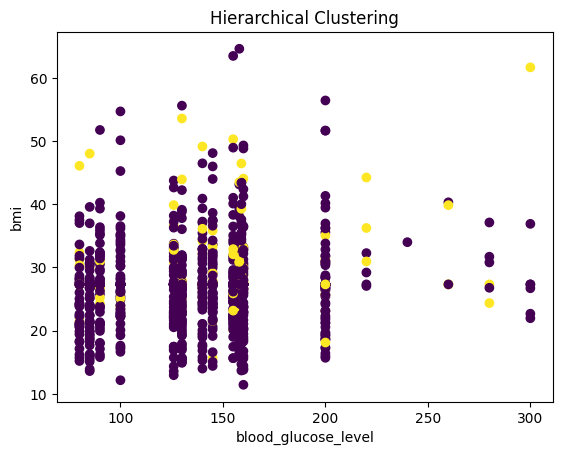

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes_prediction_dataset.csv')

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

num_clusters = 2

hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

hierarchical.fit(X_scaled)

data['Cluster'] = hierarchical.labels_

print(data.head(100))

plt.scatter(data['blood_glucose_level'], data['bmi'], c=data['Cluster'], cmap='viridis')
plt.xlabel('blood_glucose_level')
plt.ylabel('bmi')
plt.title('Hierarchical Clustering')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def predict_cluster(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level):
    data = pd.read_csv('diabetes_prediction_dataset.csv')
    X = data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

    new_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    X = pd.concat([X, new_data], ignore_index=True)

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    num_clusters = 2

    hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

    hierarchical.fit(X_scaled)

    new_data_index = len(X) - 1
    predicted_cluster = hierarchical.labels_[new_data_index]

    return predicted_cluster

age = float(input("Masukkan usia: "))
hypertension = int(input("Apakah memiliki hipertensi? (1 untuk ya, 0 untuk tidak): "))
heart_disease = int(input("Apakah memiliki penyakit jantung? (1 untuk ya, 0 untuk tidak): "))
bmi = float(input("Masukkan BMI: "))
HbA1c_level = float(input("Masukkan level HbA1c: "))
blood_glucose_level = float(input("Masukkan level glukosa darah: "))

predicted_cluster = predict_cluster(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level)
if predicted_cluster == 0:
  predicted_cluster = "false"

else:
  predicted_cluster = "true"
print(f"Data tersebut masuk ke dalam cluster: {predicted_cluster}")


Masukkan usia: 53
Apakah memiliki hipertensi? (1 untuk ya, 0 untuk tidak): 1
Apakah memiliki penyakit jantung? (1 untuk ya, 0 untuk tidak): 1
Masukkan BMI: 34
Masukkan level HbA1c: 43
Masukkan level glukosa darah: 535
Data tersebut masuk ke dalam cluster: true
